## This notebook is for blackbox ML

1. split into three: short, medium and long life span 
2. we will perform missing data and correlation analysis on the three subsets
3. we will build three models for these things using dumb ML

In [ ]:
#read in data and do imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 

%store -r galaxy_df
galaxy_full_df=pd.read_csv('/home/jovyan/work/data/train.csv')

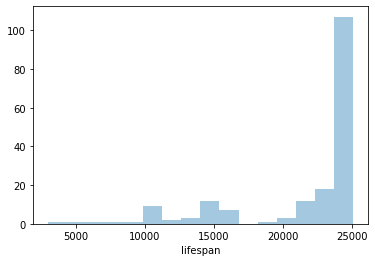

In [ ]:
#split into short, medium, long, 
#look at data correlations within these 

# create galaxy_cross_sectional_df which contains a galaxy, its lifespan, its average(?) levels of features/last in time
galaxy_cross_sectional_df = pd.DataFrame(galaxy_df.groupby('galaxy').apply(lambda grp: max(grp['galactic year']) - min(grp['galactic year'])))
galaxy_cross_sectional_df.columns = ['lifespan']
sns.distplot(galaxy_cross_sectional_df['lifespan'],kde=False)

galaxy_cross_sectional_df['lifespan_class']=pd.cut(galaxy_cross_sectional_df['lifespan'],labels=["short", "medium", "long","very_very_long"],bins=[0,10000,17500,22500,25031])


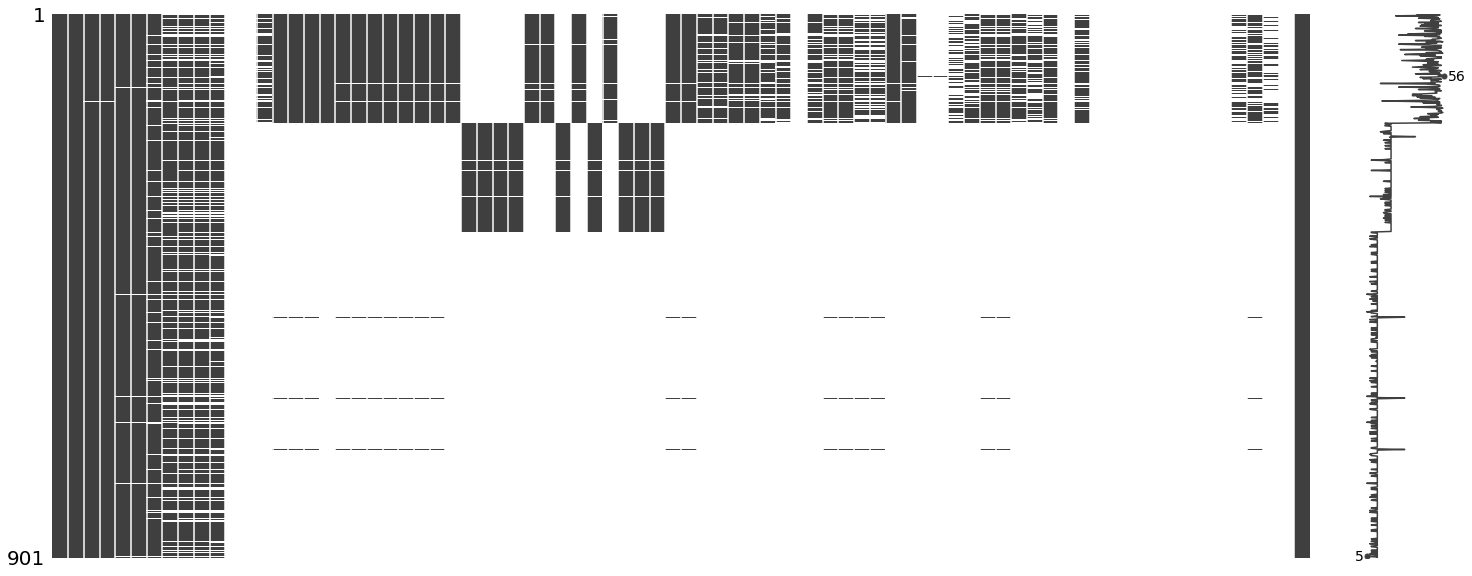

<Figure size 432x288 with 0 Axes>

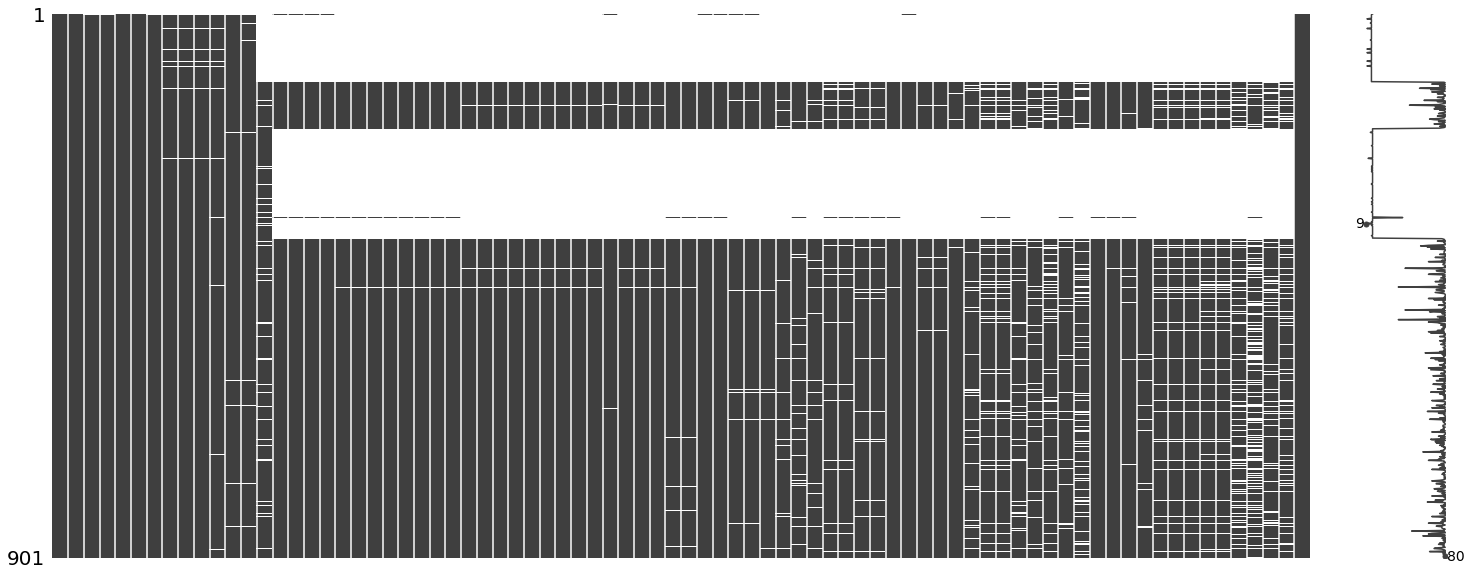

In [ ]:
msno.matrix(galaxy_full_df.groupby('galaxy').head()) 
plt.figure()
msno.matrix(galaxy_full_df.groupby('galaxy').tail()) 


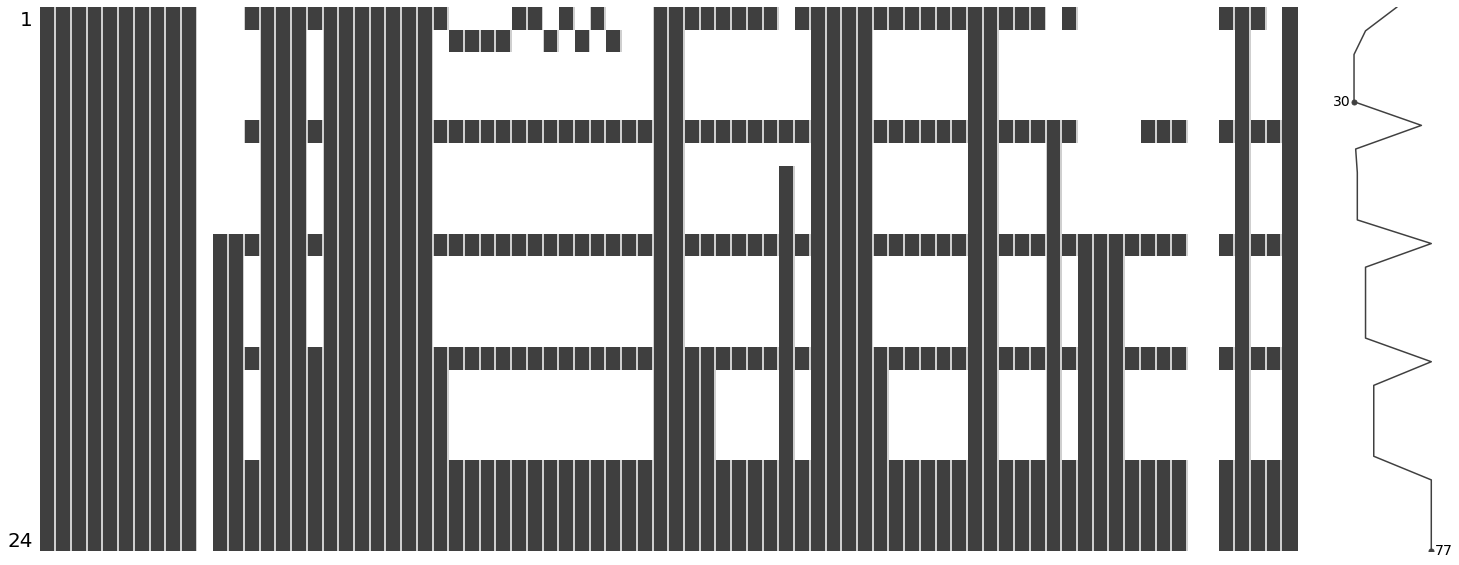

In [ ]:
msno.matrix(galaxy_full_df[galaxy_full_df['galaxy']=='NGC 1560'])

In [ ]:
galaxy_full_df['missing_values'] = galaxy_full_df.isnull().sum(axis=1)
galaxy_full_df['missing_ratio'] = galaxy_full_df['missing_values'] / galaxy_full_df.shape[1]
galaxy_full_df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,missing_values,missing_ratio
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,42,0.518519
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868,27,0.333333
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449,27,0.333333
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,56,0.691358
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247,34,0.419753
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,...,NaN,NaN,NaN,40.118699,3.981105,21.012897,NaN,0.052871,29,0.358025
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,...,NaN,NaN,NaN,12.984996,4.320539,NaN,NaN,0.052780,28,0.345679
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.191899,NaN,NaN,0.062652,41,0.506173
8,990025,Aquarius II,0.657402,61.337084,18231.029378,0.826377,15.173325,6.941815,0.725536,0.647240,...,NaN,NaN,NaN,-4.709357,6.151802,NaN,NaN,0.053927,27,0.333333
9,990025,Andromeda XI,0.657180,62.554929,16196.125655,0.679096,12.937281,6.529242,0.561520,0.482450,...,NaN,NaN,NaN,8.731994,6.684401,NaN,NaN,0.050588,32,0.395062


# building model for NGC 1560

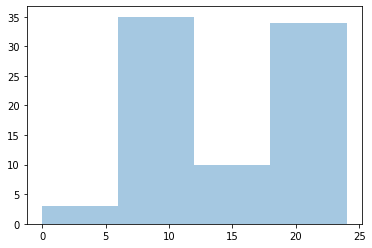

In [ ]:
#find blank columns 
ngc_1560_df=galaxy_full_df[galaxy_full_df['galaxy']=='NGC 1560']
sns.distplot(ngc_1560_df.count(),kde=False)
col_list=[ngc_1560_df.columns[i] for i,x in enumerate(ngc_1560_df.count()) if x==24]
ngc_1560_df=ngc_1560_df[col_list]

,galactic year,existence expectancy index,Education Index,"Population, total (millions)","Population, ages 15–64 (millions)","Population, ages 65 and older (millions)",y,missing_values,missing_ratio
galactic year,1.000000,0.761122,0.801444,0.914041,0.951726,0.965724,-0.871364,NaN,NaN
existence expectancy index,0.761122,1.000000,0.734461,0.710904,0.715440,0.722104,-0.735965,NaN,NaN
Education Index,0.801444,0.734461,1.000000,0.745661,0.795199,0.796342,NaN,NaN,NaN
"Population, total (millions)",0.914041,0.710904,0.745661,1.000000,0.822808,0.862100,-0.808092,NaN,NaN
"Population, ages 15–64 (millions)",0.951726,0.715440,0.795199,0.822808,1.000000,0.939448,-0.876953,NaN,NaN
"Population, ages 65 and older (millions)",0.965724,0.722104,0.796342,0.862100,0.939448,1.000000,-0.889059,NaN,NaN
y,-0.871364,-0.735965,NaN,-0.808092,-0.876953,-0.889059,1.000000,NaN,NaN
missing_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
missing_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


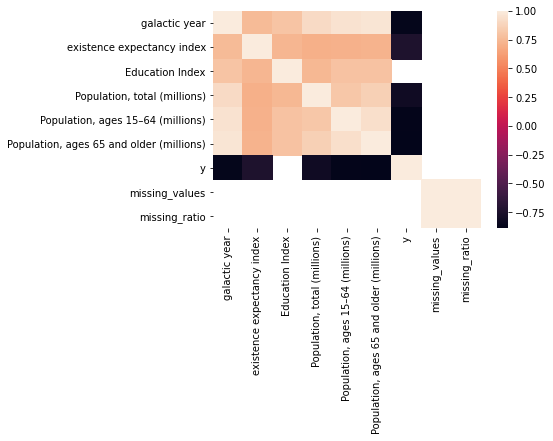

In [ ]:
#msno.matrix(ngc_1560_df)
corr_rows_df=ngc_1560_df.corr()[abs(ngc_1560_df.corr())>0.7].dropna(thresh=2,axis=0)
sns.heatmap(corr_rows_df.dropna(thresh=2,axis=1))
corr_rows_df.dropna(thresh=2,axis=1)


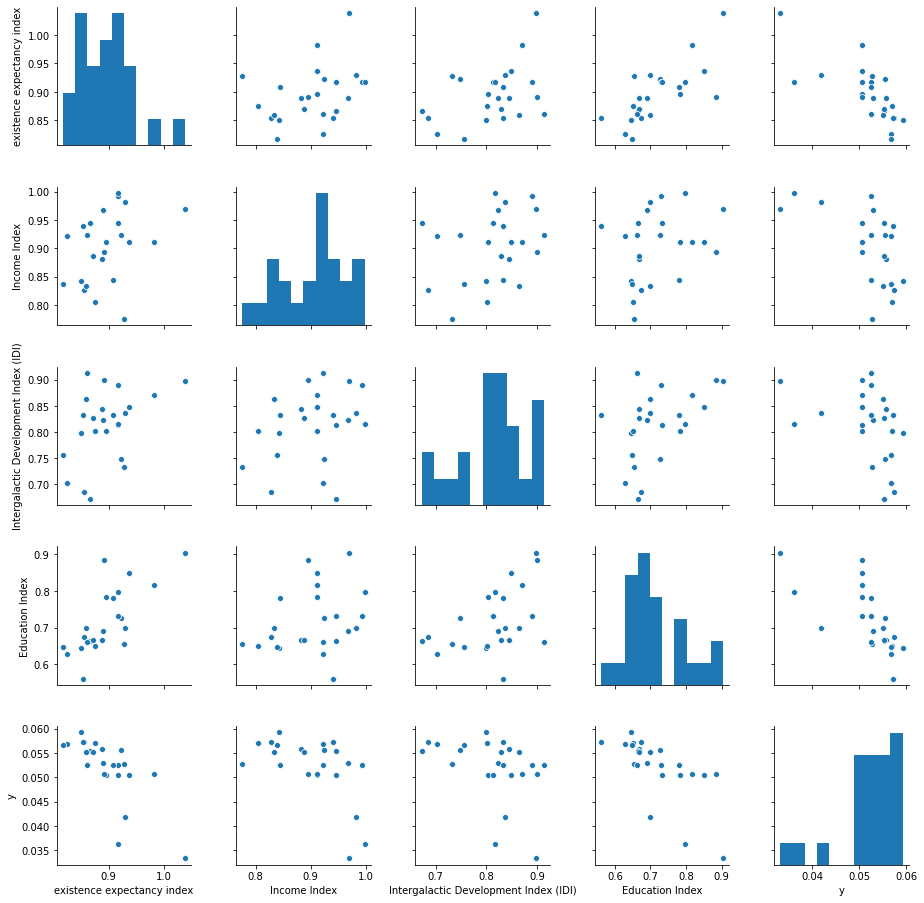

In [ ]:
#sns.pairplot(ngc_1560_df)
list(ngc_1560_df)
#sns.pairplot(ngc_1560_df[ngc_1560_df.columns.difference(['missing_values', 
#'missing_ratio', 'galaxy', 'existence expectancy index','Income Index','Intergalactic Development Index (IDI)','Education Index')])
sns.pairplot(ngc_1560_df[['existence expectancy index','Income Index','Intergalactic Development Index (IDI)','Education Index','y']])

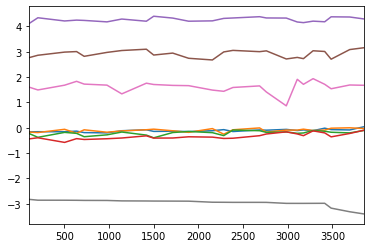

In [ ]:
#ngc_1560_df = ngc_1560_df.set_index('galactic year') #1015056

#ngc_1560_df.plot(legend=False)
ngc_1560_df[['existence expectancy index','Income Index','Intergalactic Development Index (IDI)', 
'Education Index', 'Population, urban (%)',
'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))','Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total','y']].apply(np.log).plot(legend=False)


In [ ]:
ngc_1560_df.to_csv('/home/jovyan/work/data/ngc_1560_df.csv')

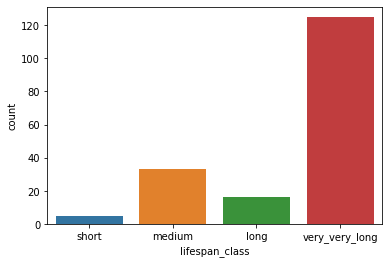

In [ ]:
#counts of galaxies in different intervals 

sns.countplot(galaxy_cross_sectional_df['lifespan_class'])

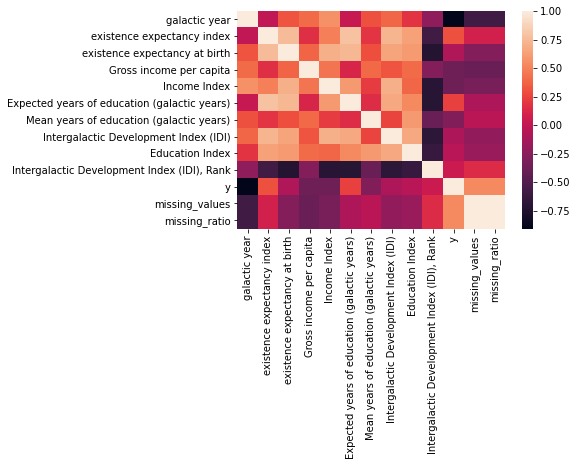

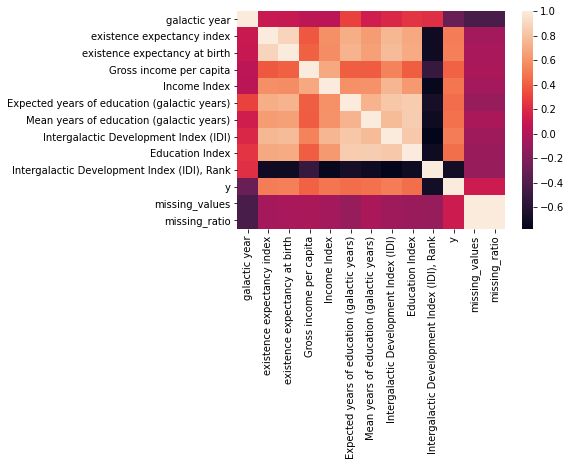

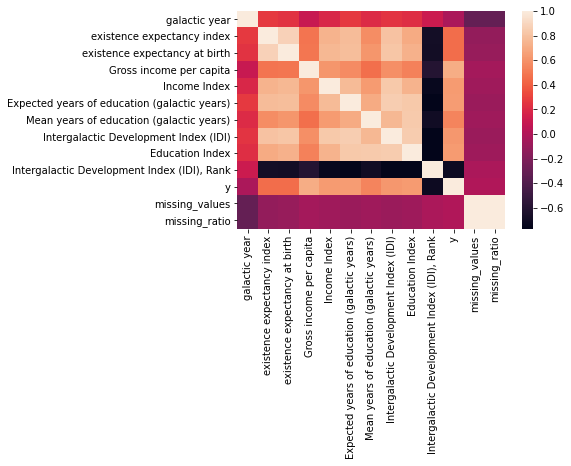

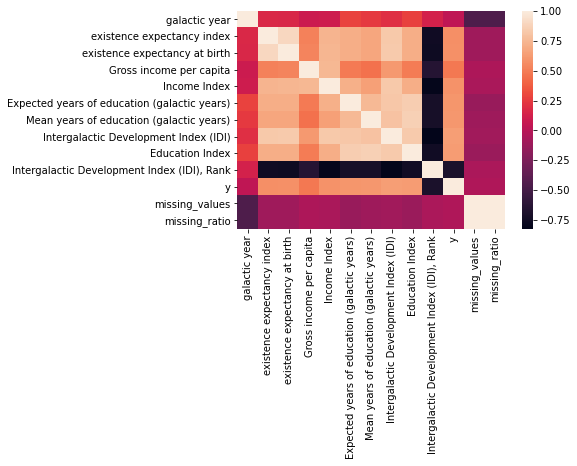

In [ ]:
short_galaxies=galaxy_cross_sectional_df[galaxy_cross_sectional_df['lifespan_class']=='short'].index
short_df = galaxy_df[galaxy_df['galaxy'].isin(list(short_galaxies))]
sns.heatmap(short_df.corr())
plt.figure()
medium_galaxies=galaxy_cross_sectional_df[galaxy_cross_sectional_df['lifespan_class']=='medium'].index
med_df = galaxy_df[galaxy_df['galaxy'].isin(list(medium_galaxies))]
sns.heatmap(med_df.corr())
plt.figure()
long_galaxies=galaxy_cross_sectional_df[galaxy_cross_sectional_df['lifespan_class']=='long'].index
long_df = galaxy_df[galaxy_df['galaxy'].isin(list(long_galaxies))]
sns.heatmap(long_df.corr())
plt.figure()
long_long_galaxies=galaxy_cross_sectional_df[galaxy_cross_sectional_df['lifespan_class']=='very_very_long'].index
long_long_df = galaxy_df[galaxy_df['galaxy'].isin(list(long_long_galaxies))]
sns.heatmap(long_long_df.corr())



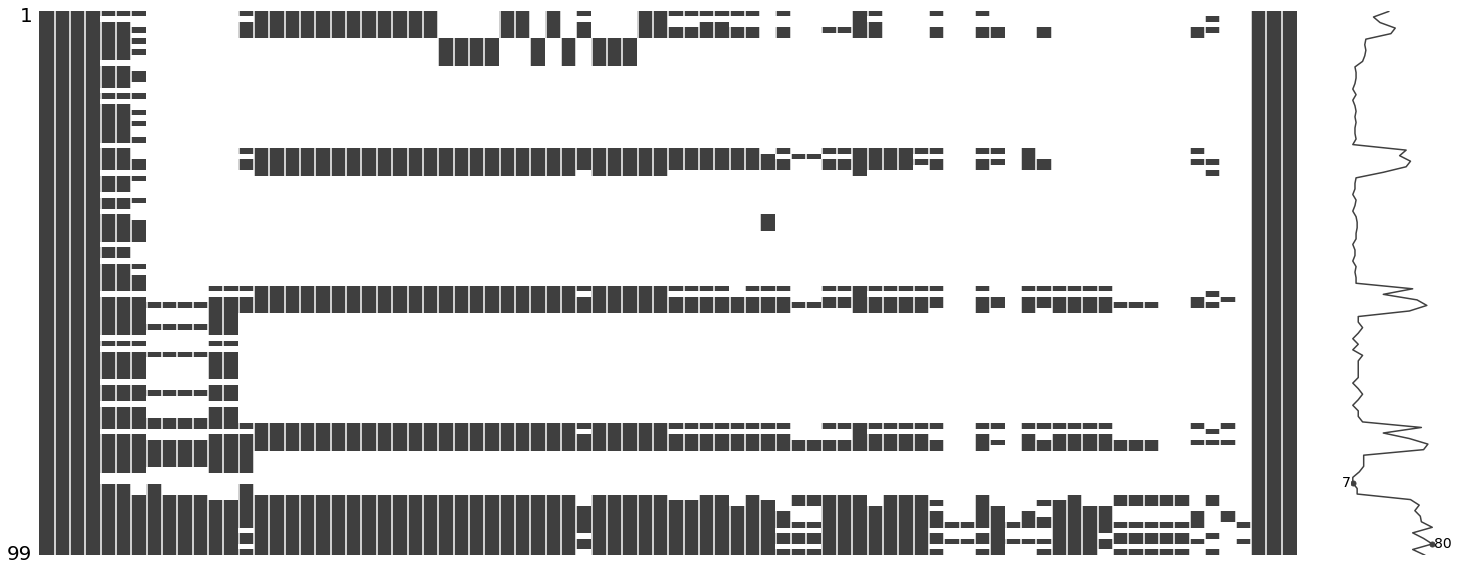

<Figure size 432x288 with 0 Axes>

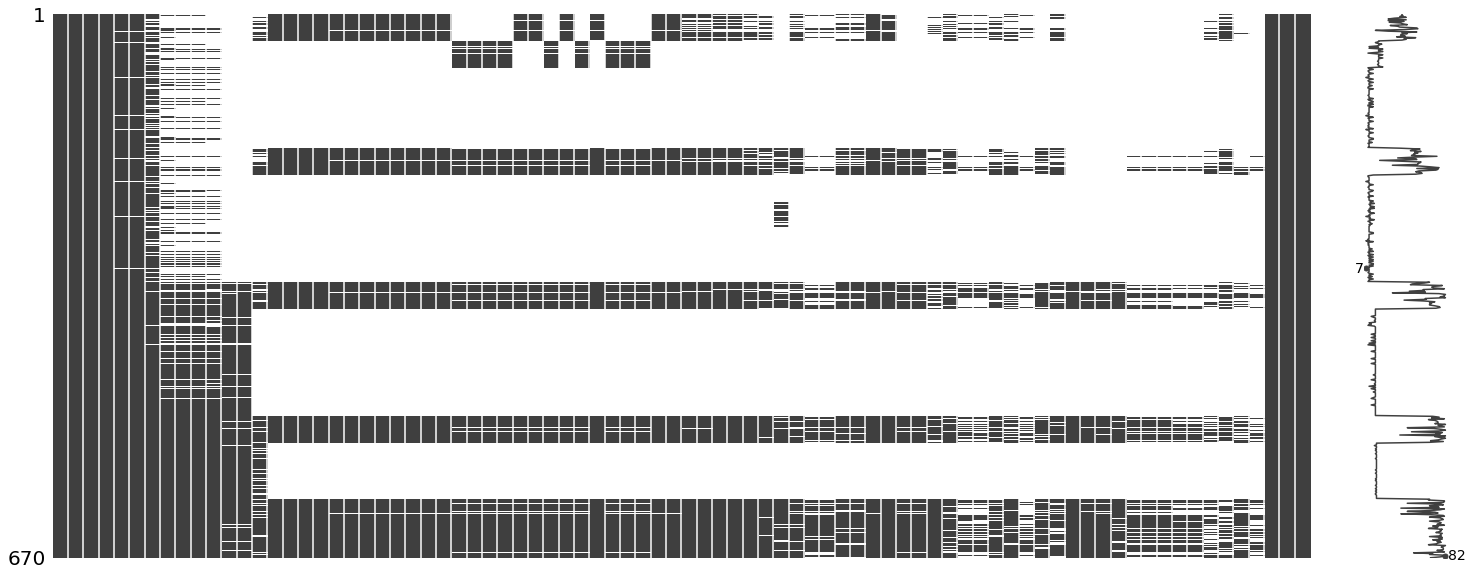

<Figure size 432x288 with 0 Axes>

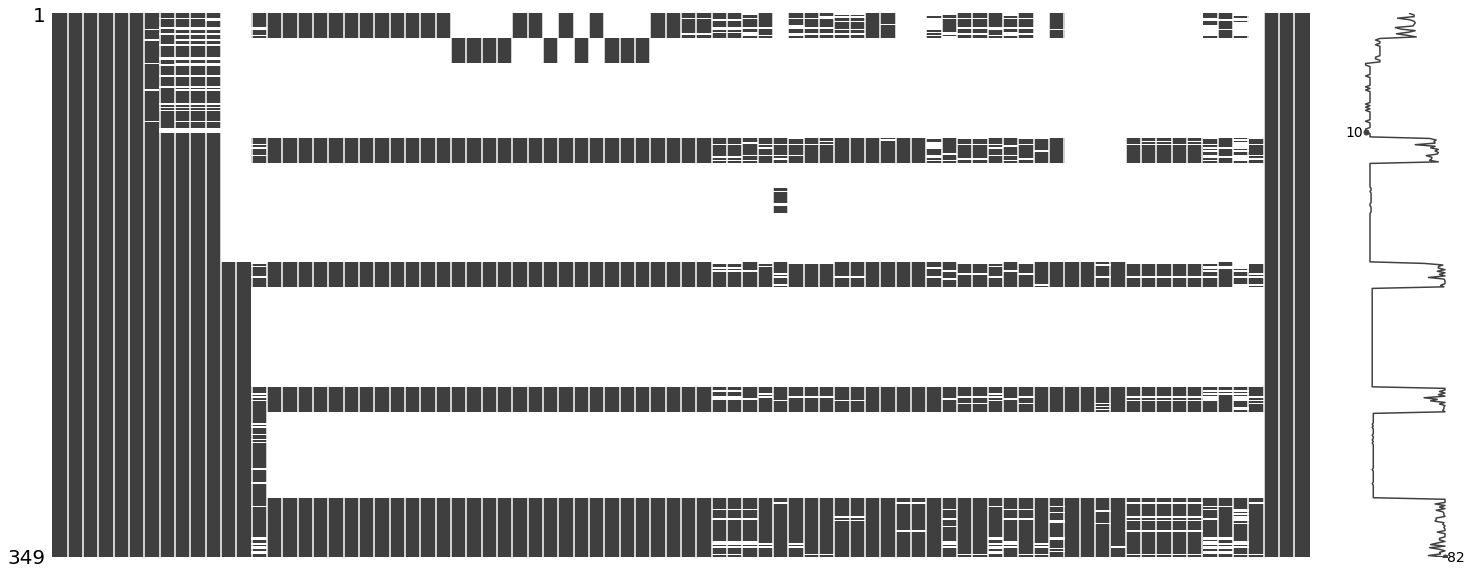

<Figure size 432x288 with 0 Axes>

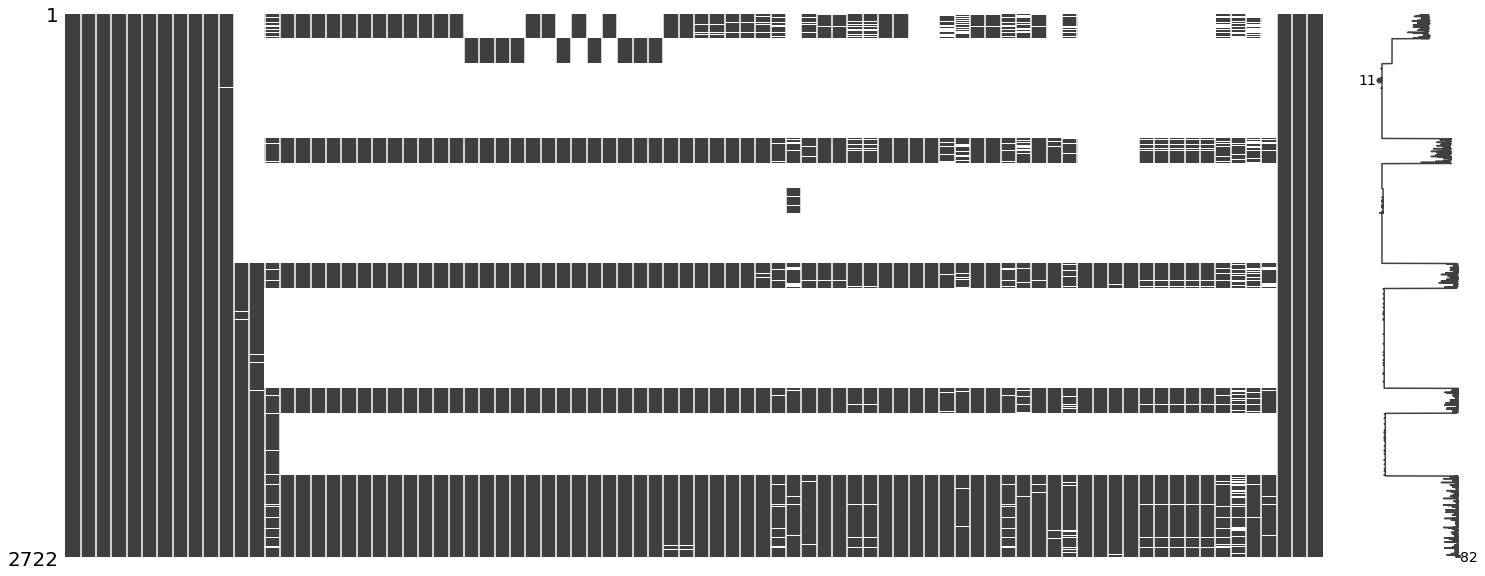

In [ ]:
short_full_df = galaxy_full_df[galaxy_full_df['galaxy'].isin(list(short_galaxies))]
med_full_df = galaxy_full_df[galaxy_full_df['galaxy'].isin(list(medium_galaxies))]
long_full_df = galaxy_full_df[galaxy_full_df['galaxy'].isin(list(long_galaxies))]
long_long_full_df = galaxy_full_df[galaxy_full_df['galaxy'].isin(list(long_long_galaxies))]


msno.matrix(short_full_df) 
plt.figure()
msno.matrix(med_full_df) 
plt.figure()
msno.matrix(long_full_df) 
plt.figure()
msno.matrix(long_long_full_df) 


In [ ]:
short_full_df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,missing_values,missing_ratio
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590,42,0.518519
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394,56,0.691358
67,990025,UGCA 15 (DDO 6),0.862925,65.986547,23241.866672,0.816752,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054374,50,0.617284
75,990025,Andromeda X,0.613388,70.912884,17316.384343,0.675271,7.967386,NaN,NaN,NaN,...,NaN,NaN,NaN,15.506436,0.689837,NaN,NaN,0.052900,36,0.444444
105,990025,NGC 247,0.851501,76.568517,24813.822604,0.691750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40.815311,NaN,NaN,NaN,0.059891,40,0.493827
194,991020,Large Magellanic Cloud (LMC),0.627245,62.389059,17114.109182,0.503198,9.317262,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052115,63,0.777778
209,991020,NGC 247,0.790275,74.683639,10929.506115,0.634390,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059323,64,0.790123
223,991020,Andromeda X,0.617402,61.472786,10579.295009,0.573630,8.245725,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052228,63,0.777778
277,991020,UGCA 15 (DDO 6),0.798587,73.806771,17389.543035,0.814036,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053372,64,0.790123
306,991020,UGC 8651 (DDO 181),0.521351,61.233004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048532,66,0.814815


In [ ]:
med_full_df.iloc[-100:]

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y,missing_values,missing_ratio
3137,1007012,ESO 540-030 (KDG 2),0.950235,76.374035,24076.436298,0.745150,14.369032,12.215331,0.932027,0.918881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058735,65,0.802469
3138,1007012,UGCA 292,0.902834,83.869816,25970.468221,0.789496,15.635243,9.849254,0.786025,0.811995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053511,65,0.802469
3139,1007012,UGCA 276 (DDO 113),0.872781,83.329934,29305.024540,0.799908,18.485790,11.493200,0.805456,0.937461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040659,66,0.814815
3155,1008016,ESO 540-030 (KDG 2),0.907726,80.474865,21064.114383,0.767725,15.036268,13.561323,0.846082,0.801946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058485,65,0.802469
3162,1008016,Maffei 2,0.918490,75.402040,20011.315407,0.666669,11.997145,9.203897,0.638153,0.675842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043346,66,0.814815
3186,1008016,ESO 410-G005,0.984906,81.332563,34126.920210,0.888096,19.374736,12.577577,0.897312,0.879102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068897,65,0.802469
3187,1008016,UGCA 292,0.842670,81.000520,29784.253142,0.845236,15.597666,10.462045,0.884191,0.810138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053230,65,0.802469
3193,1008016,Pegasus III,0.696648,61.567850,38291.867641,0.914846,10.344025,8.009512,0.822359,0.648449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034429,65,0.802469
3204,1008016,Horologium I,0.932029,80.436187,28772.050818,0.798714,16.267277,8.416800,0.903632,0.708992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052344,65,0.802469
3218,1008016,Draco II,0.681014,70.247446,10678.645959,0.586634,9.069550,3.873068,0.611474,0.589677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042525,65,0.802469


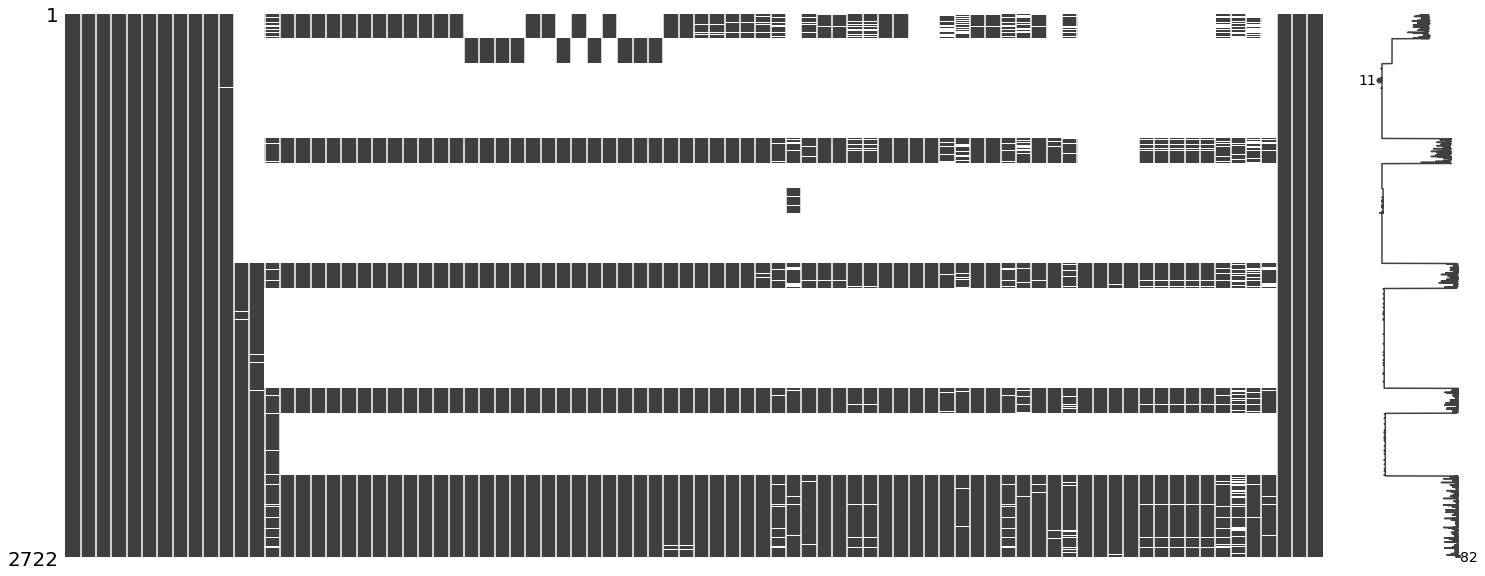

In [ ]:
msno.matrix(long_long_full_df) 
#seems like certain years have missing data

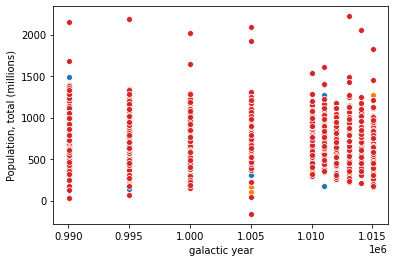

In [ ]:
sns.scatterplot(x='galactic year',y='Population, total (millions)',data=long_full_df[['Population, total (millions)','galactic year']])
sns.scatterplot(x='galactic year',y='Population, total (millions)',data=med_full_df[['Population, total (millions)','galactic year']])
sns.scatterplot(x='galactic year',y='Population, total (millions)',data=short_full_df[['Population, total (millions)','galactic year']])
sns.scatterplot(x='galactic year',y='Population, total (millions)',data=long_long_full_df[['Population, total (millions)','galactic year']])

#for older galaxies, their measurements were taken every 5e6 years. after year 1.010, they start taking measurements much more often


In [ ]:
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,11])]['galactic year'].sort_values().unique())
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,12])]['galactic year'].sort_values().unique())
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,13])]['galactic year'].sort_values().unique())
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,14])]['galactic year'].sort_values().unique())
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,15])]['galactic year'].sort_values().unique())
print(long_long_full_df[~pd.isnull(long_long_full_df.iloc[:,16])]['galactic year'].sort_values().unique())


[1000000 1001000 1002001 1003002 1004004 1005006 1006009 1007012 1008016
 1009020 1010025 1011030 1012036 1013042 1014049 1015056]
[1000000 1001000 1002001 1003002 1004004 1005006 1006009 1007012 1008016
 1009020 1010025 1011030 1012036 1013042 1014049 1015056]
[ 990025  995006 1000000 1005006 1006009 1007012 1008016 1009020 1010025
 1011030 1012036 1013042 1014049 1015056]
[ 990025  995006 1000000 1005006 1010025 1011030 1012036 1013042 1014049
 1015056]
[ 990025  995006 1000000 1005006 1010025 1011030 1012036 1013042 1014049
 1015056]
[ 990025  995006 1000000 1005006 1010025 1011030 1012036 1013042 1014049
 1015056]


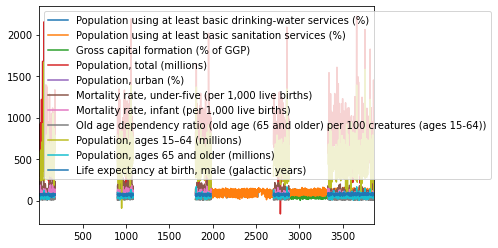

In [ ]:
long_long_full_df.iloc[:,11:22]

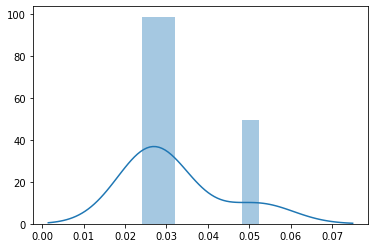

In [ ]:
#try xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn import metrics

X = galaxy_full_df.drop(['y', 'galaxy'], axis=1)
y = galaxy_full_df['y']

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=69, n_estimators=50,booster='gbtree',max_depth=10)


scores = cross_val_score(xgb_model, X, y, cv=6, scoring='neg_root_mean_squared_error')
sns.distplot(-scores)

#grid search on eta range (0.01-0.2)
#min_child_weight - tuned using cv; include gamma 
#pass in galaxy and make it categorical
#col_sample
#lambda, alpha

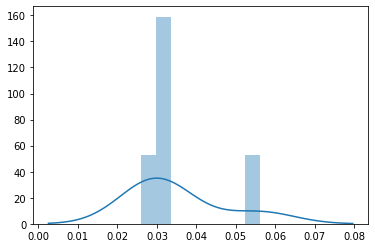

In [ ]:
#try xgboost
from sklearn.model_selection import cross_val_score

X = long_long_full_df.drop(['y', 'galaxy'], axis=1)
y = long_long_full_df['y']

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=69)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
sns.distplot(-scores)

[0]	train-rmse:0.38022+0.00025	test-rmse:0.38028+0.00102
[1]	train-rmse:0.34258+0.00023	test-rmse:0.34267+0.00099
[2]	train-rmse:0.30873+0.00019	test-rmse:0.30892+0.00098
[3]	train-rmse:0.27827+0.00017	test-rmse:0.27854+0.00097
[4]	train-rmse:0.25084+0.00018	test-rmse:0.25123+0.00091
[5]	train-rmse:0.22616+0.00015	test-rmse:0.22668+0.00086
[6]	train-rmse:0.20399+0.00013	test-rmse:0.20461+0.00082
[7]	train-rmse:0.18404+0.00014	test-rmse:0.18475+0.00081
[8]	train-rmse:0.16608+0.00015	test-rmse:0.16698+0.00078
[9]	train-rmse:0.14996+0.00014	test-rmse:0.15106+0.00078
[10]	train-rmse:0.13546+0.00013	test-rmse:0.13671+0.00081
[11]	train-rmse:0.12241+0.00010	test-rmse:0.12386+0.00083
[12]	train-rmse:0.11071+0.00009	test-rmse:0.11235+0.00085
[13]	train-rmse:0.10020+0.00008	test-rmse:0.10209+0.00087
[14]	train-rmse:0.09074+0.00005	test-rmse:0.09286+0.00085
[15]	train-rmse:0.08228+0.00007	test-rmse:0.08467+0.00086
[16]	train-rmse:0.07467+0.00005	test-rmse:0.07736+0.00088
[17]	train-rmse:0.06786+

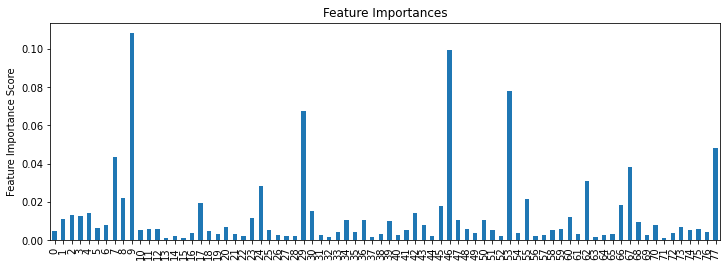

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = galaxy_full_df
target = 'y'
IDcol = 'galaxy'

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
        
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
                    
    feat_imp = pd.Series(alg.feature_importances_)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=69)
modelfit(xgb1, train, predictors)

In [ ]:
test_df = pd.read_csv('/home/jovyan/work/data/test.csv').drop('galaxy', axis=1)
test_df['y_pred'] = xgb1.predict(test_df)
test_df['galaxy'] = pd.read_csv('/home/jovyan/work/data/test.csv')['galaxy']
test_df.to_csv('/home/jovyan/work/data/results_df.csv')
test_df.head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y_pred,galaxy
0,1007012,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041314,KK98 77
1,1007012,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040265,Reticulum III
2,1008016,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040627,Reticulum III
3,1007012,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040958,Segue 1
4,1013042,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,...,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN,0.022144,Virgo I
